# 1. Importando Bibliotecas e o Dataset

### 1.1 Importando bibliotecas necessárias como pandas, numpy, seaborn e etc..

In [90]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_validate, KFold, train_test_split
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge
from pandas.io.formats.style import Styler

### 1.2 Lendo o conjunto de dados de treinamento (train.csv) e analisando suas características

In [91]:
dataset = pd.read_csv('train.csv')
dataset.head()

,AdiposeTissue,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,29.9,1.0316,65.0,189.75,65.75,40.8,106.4,100.5,100.5,NaN,38.1,24.0,35.9,NaN,19.1,29.9
1,27.0,1.0378,72.0,168.00,69.25,38.5,101.4,99.8,96.2,56.3,36.6,22.0,29.7,26.3,18.0,27.0
2,8.8,1.0790,29.0,160.75,69.00,36.7,97.4,83.5,98.7,58.9,35.3,22.6,30.1,26.7,17.6,8.8
3,34.3,1.0180,35.0,228.25,NaN,40.4,114.9,115.9,111.9,74.4,NaN,24.0,36.1,31.8,18.8,34.3
4,20.3,1.0525,35.0,224.75,72.25,43.9,NaN,100.4,106.8,63.3,41.7,24.6,37.2,33.1,19.8,20.3


In [92]:
dataset.shape

(176, 16)

In [94]:
dataset.describe()

,AdiposeTissue,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
count,147.000000,158.000000,152.000000,162.000000,146.000000,151.000000,140.000000,150.000000,144.000000,147.000000,148.000000,146.000000,144.000000,148.000000,155.000000,176.000000
mean,19.406803,1.055049,45.532895,178.781790,69.957192,38.021192,101.149286,92.969333,99.937500,59.427211,38.704730,23.003425,32.309722,28.641892,18.250968,19.571591
std,9.023984,0.019685,12.620239,28.425279,4.210860,2.426070,8.637050,10.992670,6.637274,5.078150,2.450138,1.391869,2.993614,1.954100,0.933738,8.796674
min,0.000000,0.995000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.300000,50.000000,33.000000,19.700000,24.800000,21.000000,15.800000,0.000000
25%,12.000000,1.040300,38.500000,160.062500,68.250000,36.450000,94.150000,84.675000,95.475000,56.050000,37.300000,22.000000,30.175000,27.300000,17.700000,12.375000
50%,20.100000,1.054000,44.000000,176.875000,70.000000,38.100000,99.900000,91.200000,99.450000,59.100000,38.550000,22.800000,32.050000,28.750000,18.300000,19.900000
75%,25.900000,1.070375,55.000000,198.125000,72.000000,40.000000,106.100000,100.375000,103.950000,62.100000,40.200000,24.000000,34.400000,29.800000,18.800000,26.000000
max,47.500000,1.108900,81.000000,262.750000,77.750000,43.900000,128.300000,126.200000,116.100000,74.400000,46.000000,27.000000,39.100000,33.100000,21.400000,47.500000


In [93]:
dataset

,AdiposeTissue,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,29.9,1.0316,65.0,189.75,65.75,40.8,106.4,100.5,100.5,NaN,38.1,24.0,35.9,NaN,19.1,29.9
1,27.0,1.0378,72.0,168.00,69.25,38.5,101.4,99.8,96.2,56.3,36.6,22.0,29.7,26.3,18.0,27.0
2,8.8,1.0790,29.0,160.75,69.00,36.7,97.4,83.5,98.7,58.9,35.3,22.6,30.1,26.7,17.6,8.8
3,34.3,1.0180,35.0,228.25,NaN,40.4,114.9,115.9,111.9,74.4,NaN,24.0,36.1,31.8,18.8,34.3
4,20.3,1.0525,35.0,224.75,72.25,43.9,NaN,100.4,106.8,63.3,41.7,24.6,37.2,33.1,19.8,20.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,NaN,NaN,43.0,200.25,NaN,38.6,105.2,102.8,103.6,NaN,39.3,23.5,30.5,28.5,18.1,19.3
172,22.1,1.0484,35.0,187.75,69.50,40.5,101.3,96.4,100.1,69.0,39.0,23.1,36.1,30.5,18.2,22.1
173,8.5,1.0795,47.0,NaN,NaN,37.5,97.2,NaN,95.4,56.9,38.3,22.1,30.1,28.2,18.4,8.5
174,16.9,1.0603,39.0,234.75,NaN,42.8,109.5,104.5,109.9,69.5,43.1,NaN,39.1,32.5,NaN,16.9


## 1.3 Analisando a distribuição das variáveis

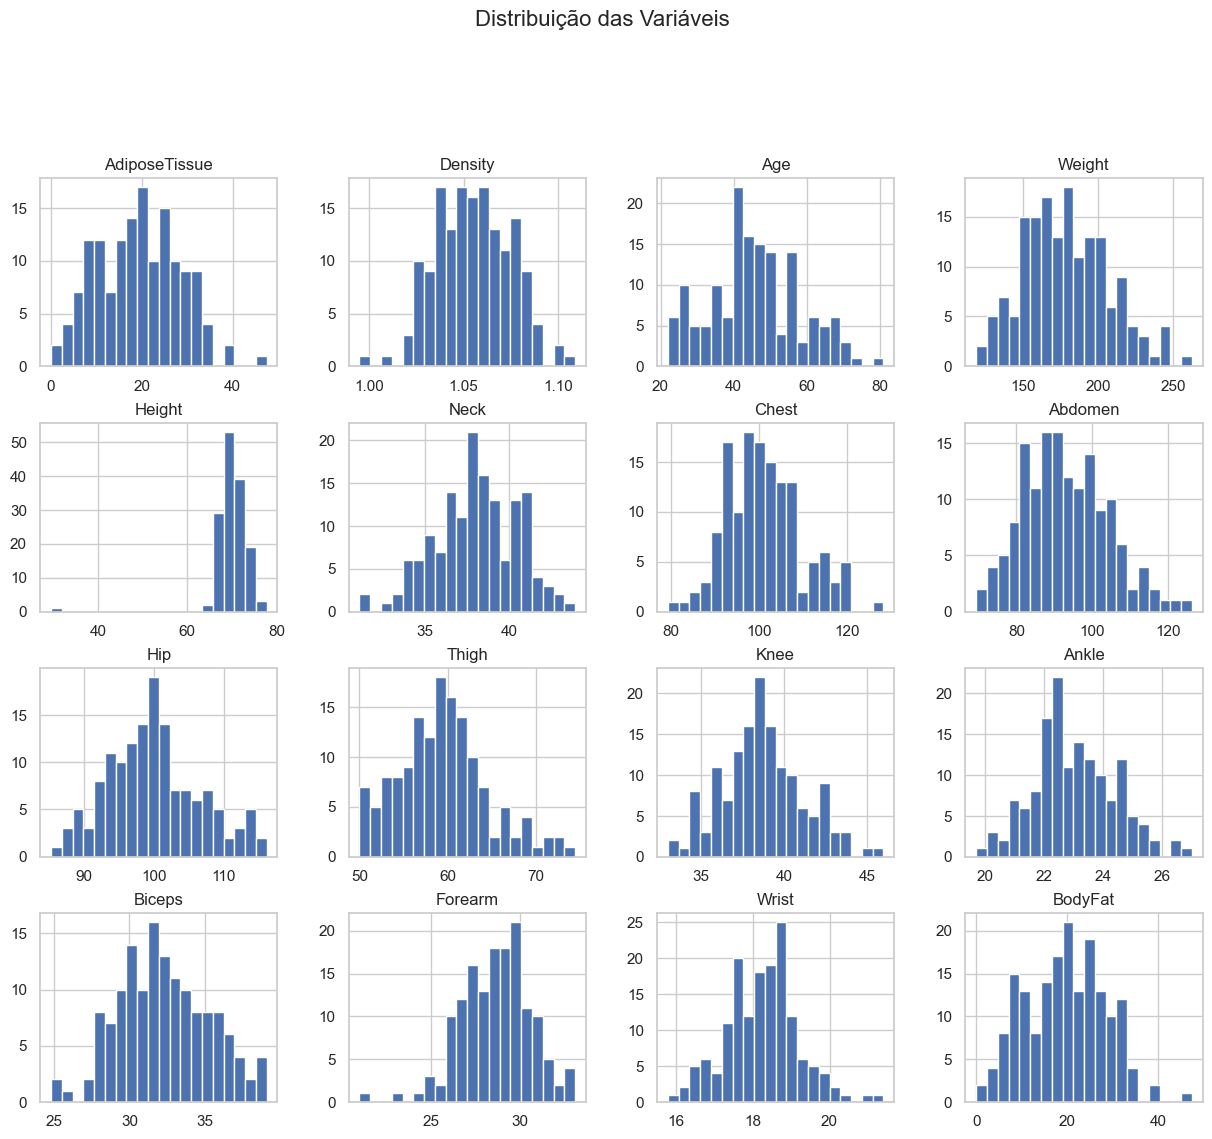

In [95]:
# Configurar estilo para gráficos
sns.set(style="whitegrid")

# Histogramas para cada variável
dataset.hist(bins=20, figsize=(15, 12))
plt.suptitle('Distribuição das Variáveis', y=1.02, size=16)
plt.show()

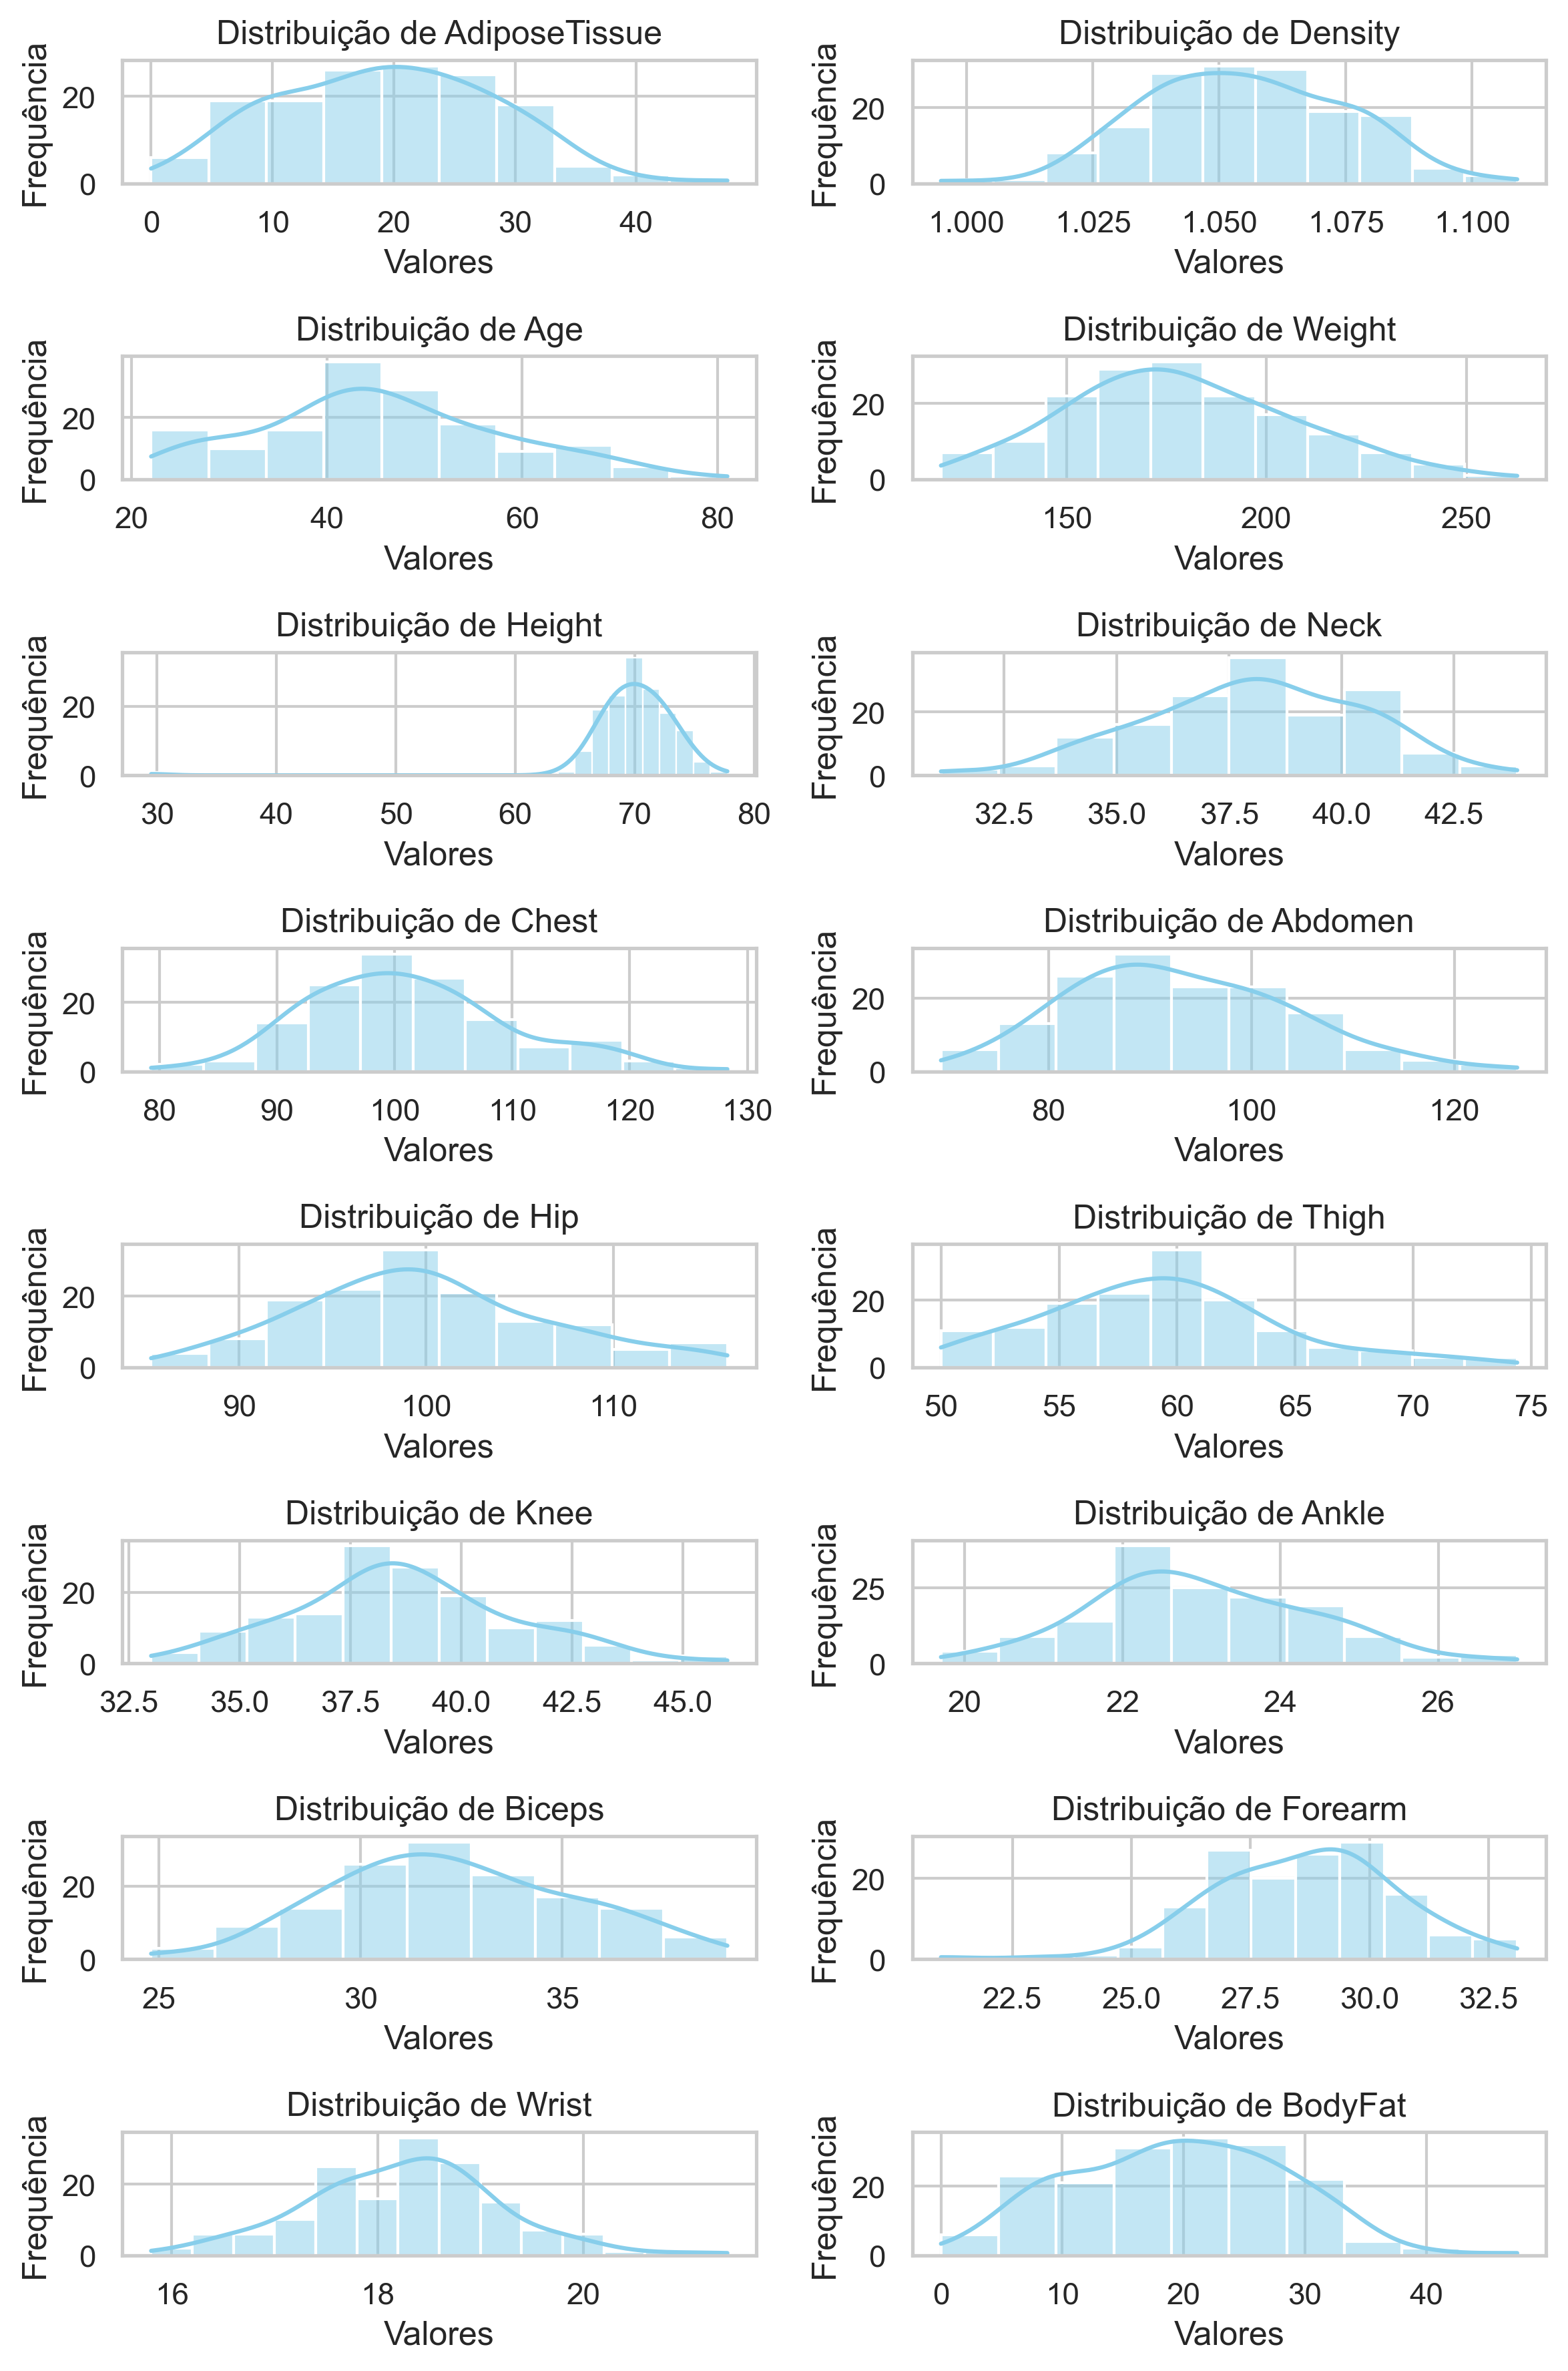

In [96]:

# Configuração do estilo do seaborn para melhor visualização
sns.set(style="whitegrid")

# Número de colunas no subplot
num_colunas = len(dataset.columns)

# Criar subplots
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(8, 12), dpi=300)
axes = axes.flatten()

# Iterar sobre as colunas e criar histogramas
for i, coluna in enumerate(dataset.columns):
    sns.histplot(dataset[coluna], kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribuição de {coluna}')
    axes[i].set_xlabel('Valores')
    axes[i].set_ylabel('Frequência')

# Desativar avisos de depreciação
warnings.filterwarnings("ignore", category=FutureWarning)

# Ajustar layout
plt.tight_layout()
plt.show()


## 1.4 Verificando valores ausentes do dataset

In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AdiposeTissue  147 non-null    float64
 1   Density        158 non-null    float64
 2   Age            152 non-null    float64
 3   Weight         162 non-null    float64
 4   Height         146 non-null    float64
 5   Neck           151 non-null    float64
 6   Chest          140 non-null    float64
 7   Abdomen        150 non-null    float64
 8   Hip            144 non-null    float64
 9   Thigh          147 non-null    float64
 10  Knee           148 non-null    float64
 11  Ankle          146 non-null    float64
 12  Biceps         144 non-null    float64
 13  Forearm        148 non-null    float64
 14  Wrist          155 non-null    float64
 15  BodyFat        176 non-null    float64
dtypes: float64(16)
memory usage: 22.1 KB


In [98]:
dataset.isna().sum()

AdiposeTissue    29
Density          18
Age              24
Weight           14
Height           30
Neck             25
Chest            36
Abdomen          26
Hip              32
Thigh            29
Knee             28
Ankle            30
Biceps           32
Forearm          28
Wrist            21
BodyFat           0
dtype: int64

In [99]:
dataset.duplicated().sum()


0

## 1.5 Substituindo valores ausentes através do método KNN imputer

In [100]:
# Identifique as colunas com dados ausentes
colunas_com_dados_ausentes = [col for col in dataset.columns if dataset[col].isnull().any()]

# Crie um KNN Imputer
imputer = KNNImputer(n_neighbors=2)

# Impute os valores ausentes
dados_imputados = imputer.fit_transform(dataset[colunas_com_dados_ausentes])

# Crie um novo DataFrame com os valores imputados
dataset_imputado = pd.DataFrame(dados_imputados, columns=colunas_com_dados_ausentes)

# Adicione as colunas que não tinham dados ausentes
colunas_sem_ausentes = [col for col in dataset.columns if col not in colunas_com_dados_ausentes]
dataset_imputado[colunas_sem_ausentes] = dataset[colunas_sem_ausentes]

# Agora, dataset_imputado contém os valores imputados mantendo a estrutura do DataFrame original
dataset= dataset_imputado
dataset

,AdiposeTissue,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,29.90,1.03160,65.0,189.75,65.750,40.8,106.4,100.50,100.5,60.85,38.10,24.00,35.9,29.2,19.1,29.9
1,27.00,1.03780,72.0,168.00,69.250,38.5,101.4,99.80,96.2,56.30,36.60,22.00,29.7,26.3,18.0,27.0
2,8.80,1.07900,29.0,160.75,69.000,36.7,97.4,83.50,98.7,58.90,35.30,22.60,30.1,26.7,17.6,8.8
3,34.30,1.01800,35.0,228.25,71.625,40.4,114.9,115.90,111.9,74.40,42.50,24.00,36.1,31.8,18.8,34.3
4,20.30,1.05250,35.0,224.75,72.250,43.9,109.0,100.40,106.8,63.30,41.70,24.60,37.2,33.1,19.8,20.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,26.45,1.04965,43.0,200.25,72.250,38.6,105.2,102.80,103.6,65.10,39.30,23.50,30.5,28.5,18.1,19.3
172,22.10,1.04840,35.0,187.75,69.500,40.5,101.3,96.40,100.1,69.00,39.00,23.10,36.1,30.5,18.2,22.1
173,8.50,1.07950,47.0,170.50,71.500,37.5,97.2,91.25,95.4,56.90,38.30,22.10,30.1,28.2,18.4,8.5
174,16.90,1.06030,39.0,234.75,71.750,42.8,109.5,104.50,109.9,69.50,43.10,24.15,39.1,32.5,19.3,16.9


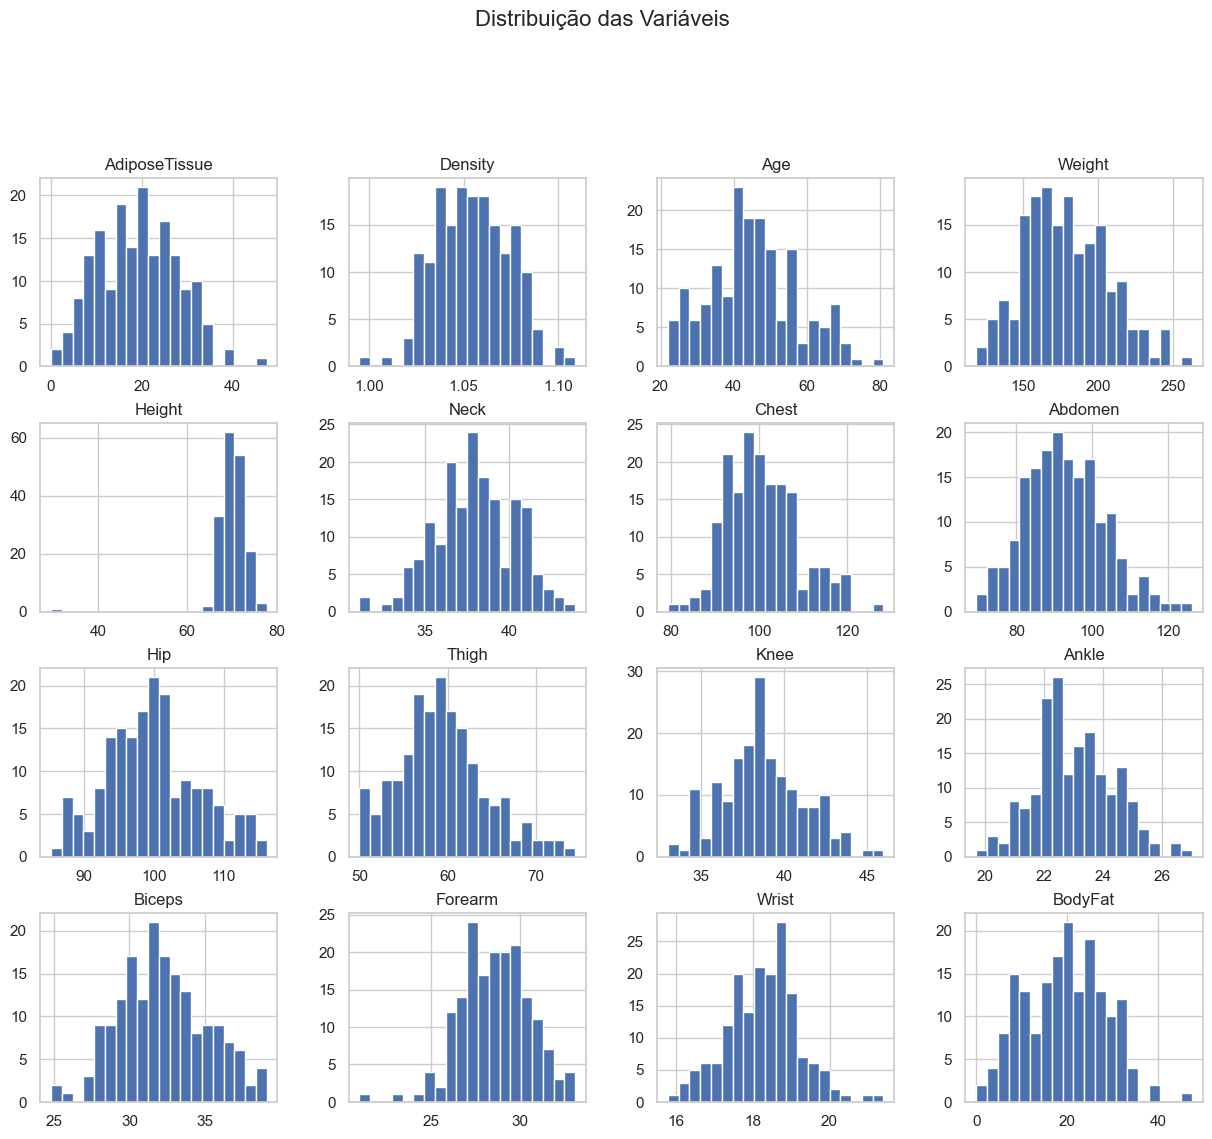

In [101]:
# Configurar estilo para gráficos
sns.set(style="whitegrid")

# Histogramas para cada variável
dataset.hist(bins=20, figsize=(15, 12))
plt.suptitle('Distribuição das Variáveis', y=1.02, size=16)
plt.show()

In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AdiposeTissue  176 non-null    float64
 1   Density        176 non-null    float64
 2   Age            176 non-null    float64
 3   Weight         176 non-null    float64
 4   Height         176 non-null    float64
 5   Neck           176 non-null    float64
 6   Chest          176 non-null    float64
 7   Abdomen        176 non-null    float64
 8   Hip            176 non-null    float64
 9   Thigh          176 non-null    float64
 10  Knee           176 non-null    float64
 11  Ankle          176 non-null    float64
 12  Biceps         176 non-null    float64
 13  Forearm        176 non-null    float64
 14  Wrist          176 non-null    float64
 15  BodyFat        176 non-null    float64
dtypes: float64(16)
memory usage: 22.1 KB


In [103]:
dataset.isna().sum()

AdiposeTissue    0
Density          0
Age              0
Weight           0
Height           0
Neck             0
Chest            0
Abdomen          0
Hip              0
Thigh            0
Knee             0
Ankle            0
Biceps           0
Forearm          0
Wrist            0
BodyFat          0
dtype: int64

In [104]:
dependent_variable = 'BodyFat'
explanatory_variables = list(dataset.drop(columns = ['BodyFat']).columns)
explanatory_variables

['AdiposeTissue',
 'Density',
 'Age',
 'Weight',
 'Height',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist']

# 2. Análise Exploratória de Dados

In [105]:
%matplotlib inline

sns.set_palette('Accent')
sns.set_style('darkgrid')

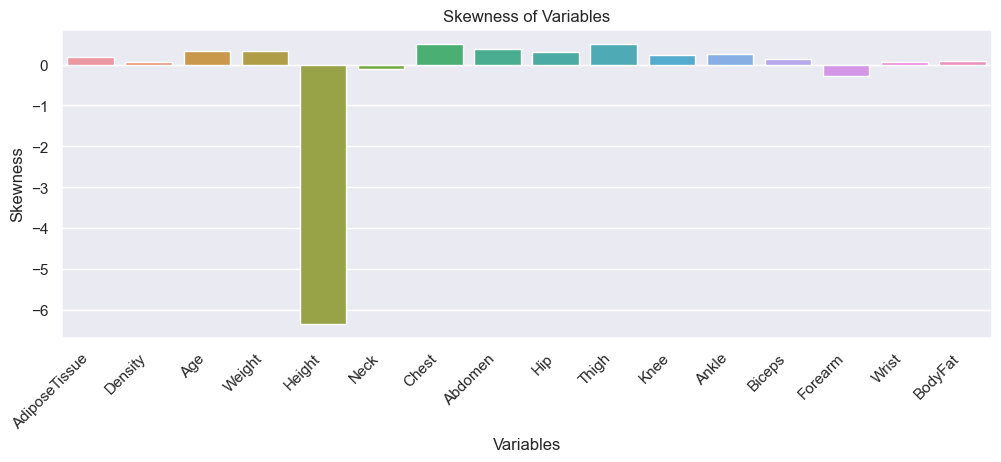

In [106]:
# Calculate skewness for each variable
skewness_per_variable = dataset.apply(lambda x: x.skew())

# Plotting
plt.figure(figsize=(12, 4))
sns.barplot(x=skewness_per_variable.index, y=skewness_per_variable)
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Variables')
plt.xlabel('Variables')
plt.ylabel('Skewness')
plt.show()

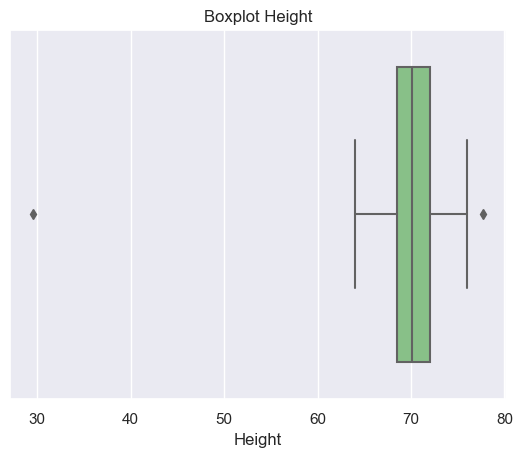

In [107]:
# Crie um boxplot para a variável "Height"
sns.boxplot(x=dataset['Height'])

# Adicione um título ao gráfico
plt.title('Boxplot Height')

# Mostre o gráfico
plt.show()


In [108]:
# Replace outliers with median
def replace_outliers_with_median(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Replace outliers with the median in the original DataFrame
    column[(column < lower_limit) | (column > upper_limit)] = column.median()

# Apply the function to specific columns
replace_outliers_with_median(dataset['Height'])

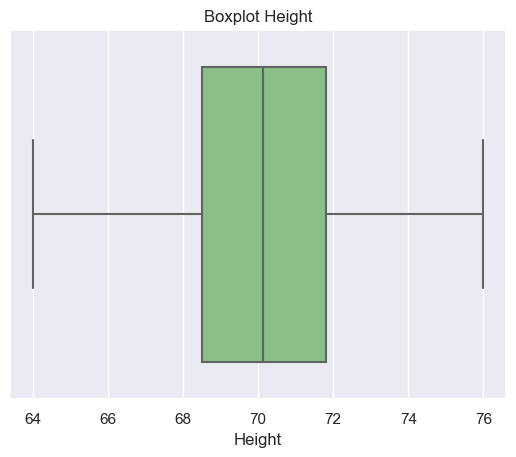

In [109]:
# Crie um boxplot para a variável "Height"
sns.boxplot(x=dataset['Height'])

# Adicione um título ao gráfico
plt.title('Boxplot Height')

# Mostre o gráfico
plt.show()


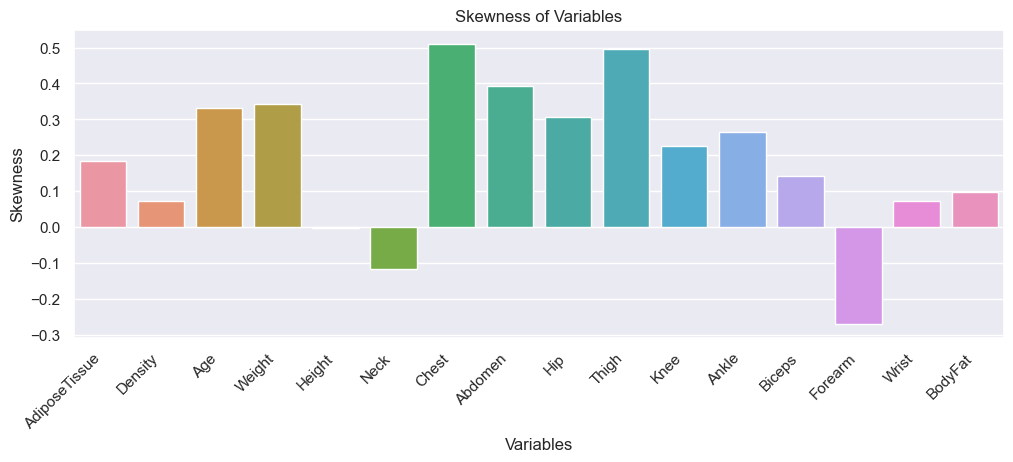

In [110]:
# Calculate skewness for each variable
skewness_per_variable = dataset.apply(lambda x: x.skew())

# Plotting
plt.figure(figsize=(12, 4))
sns.barplot(x=skewness_per_variable.index, y=skewness_per_variable)
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Variables')
plt.xlabel('Variables')
plt.ylabel('Skewness')
plt.show()

## Dependent Variable Distribution

Text(0.5, 1.0, 'Body Fat boxplot (dependent variable)')

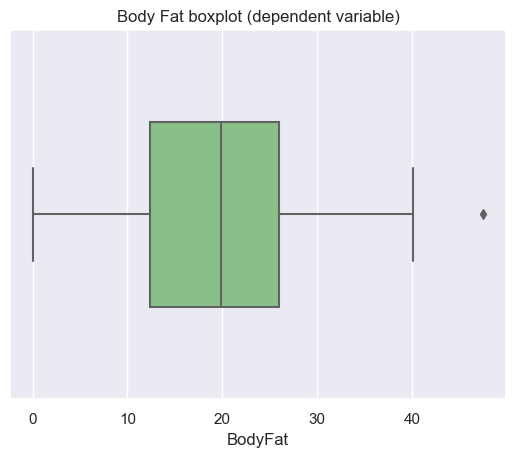

In [111]:
ax = sns.boxplot(
    data = dataset,
    x = dataset[dependent_variable],
    width = 0.5
)
ax.set_title('Body Fat boxplot (dependent variable)')

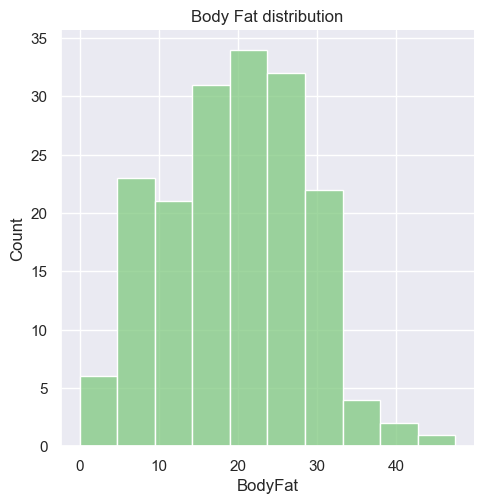

In [112]:
ax = sns.displot(
    data = dataset,
    x = dataset[dependent_variable]
)
ax.set(title = 'Body Fat distribution')

## Relationship between dependent variable and explanatory variables

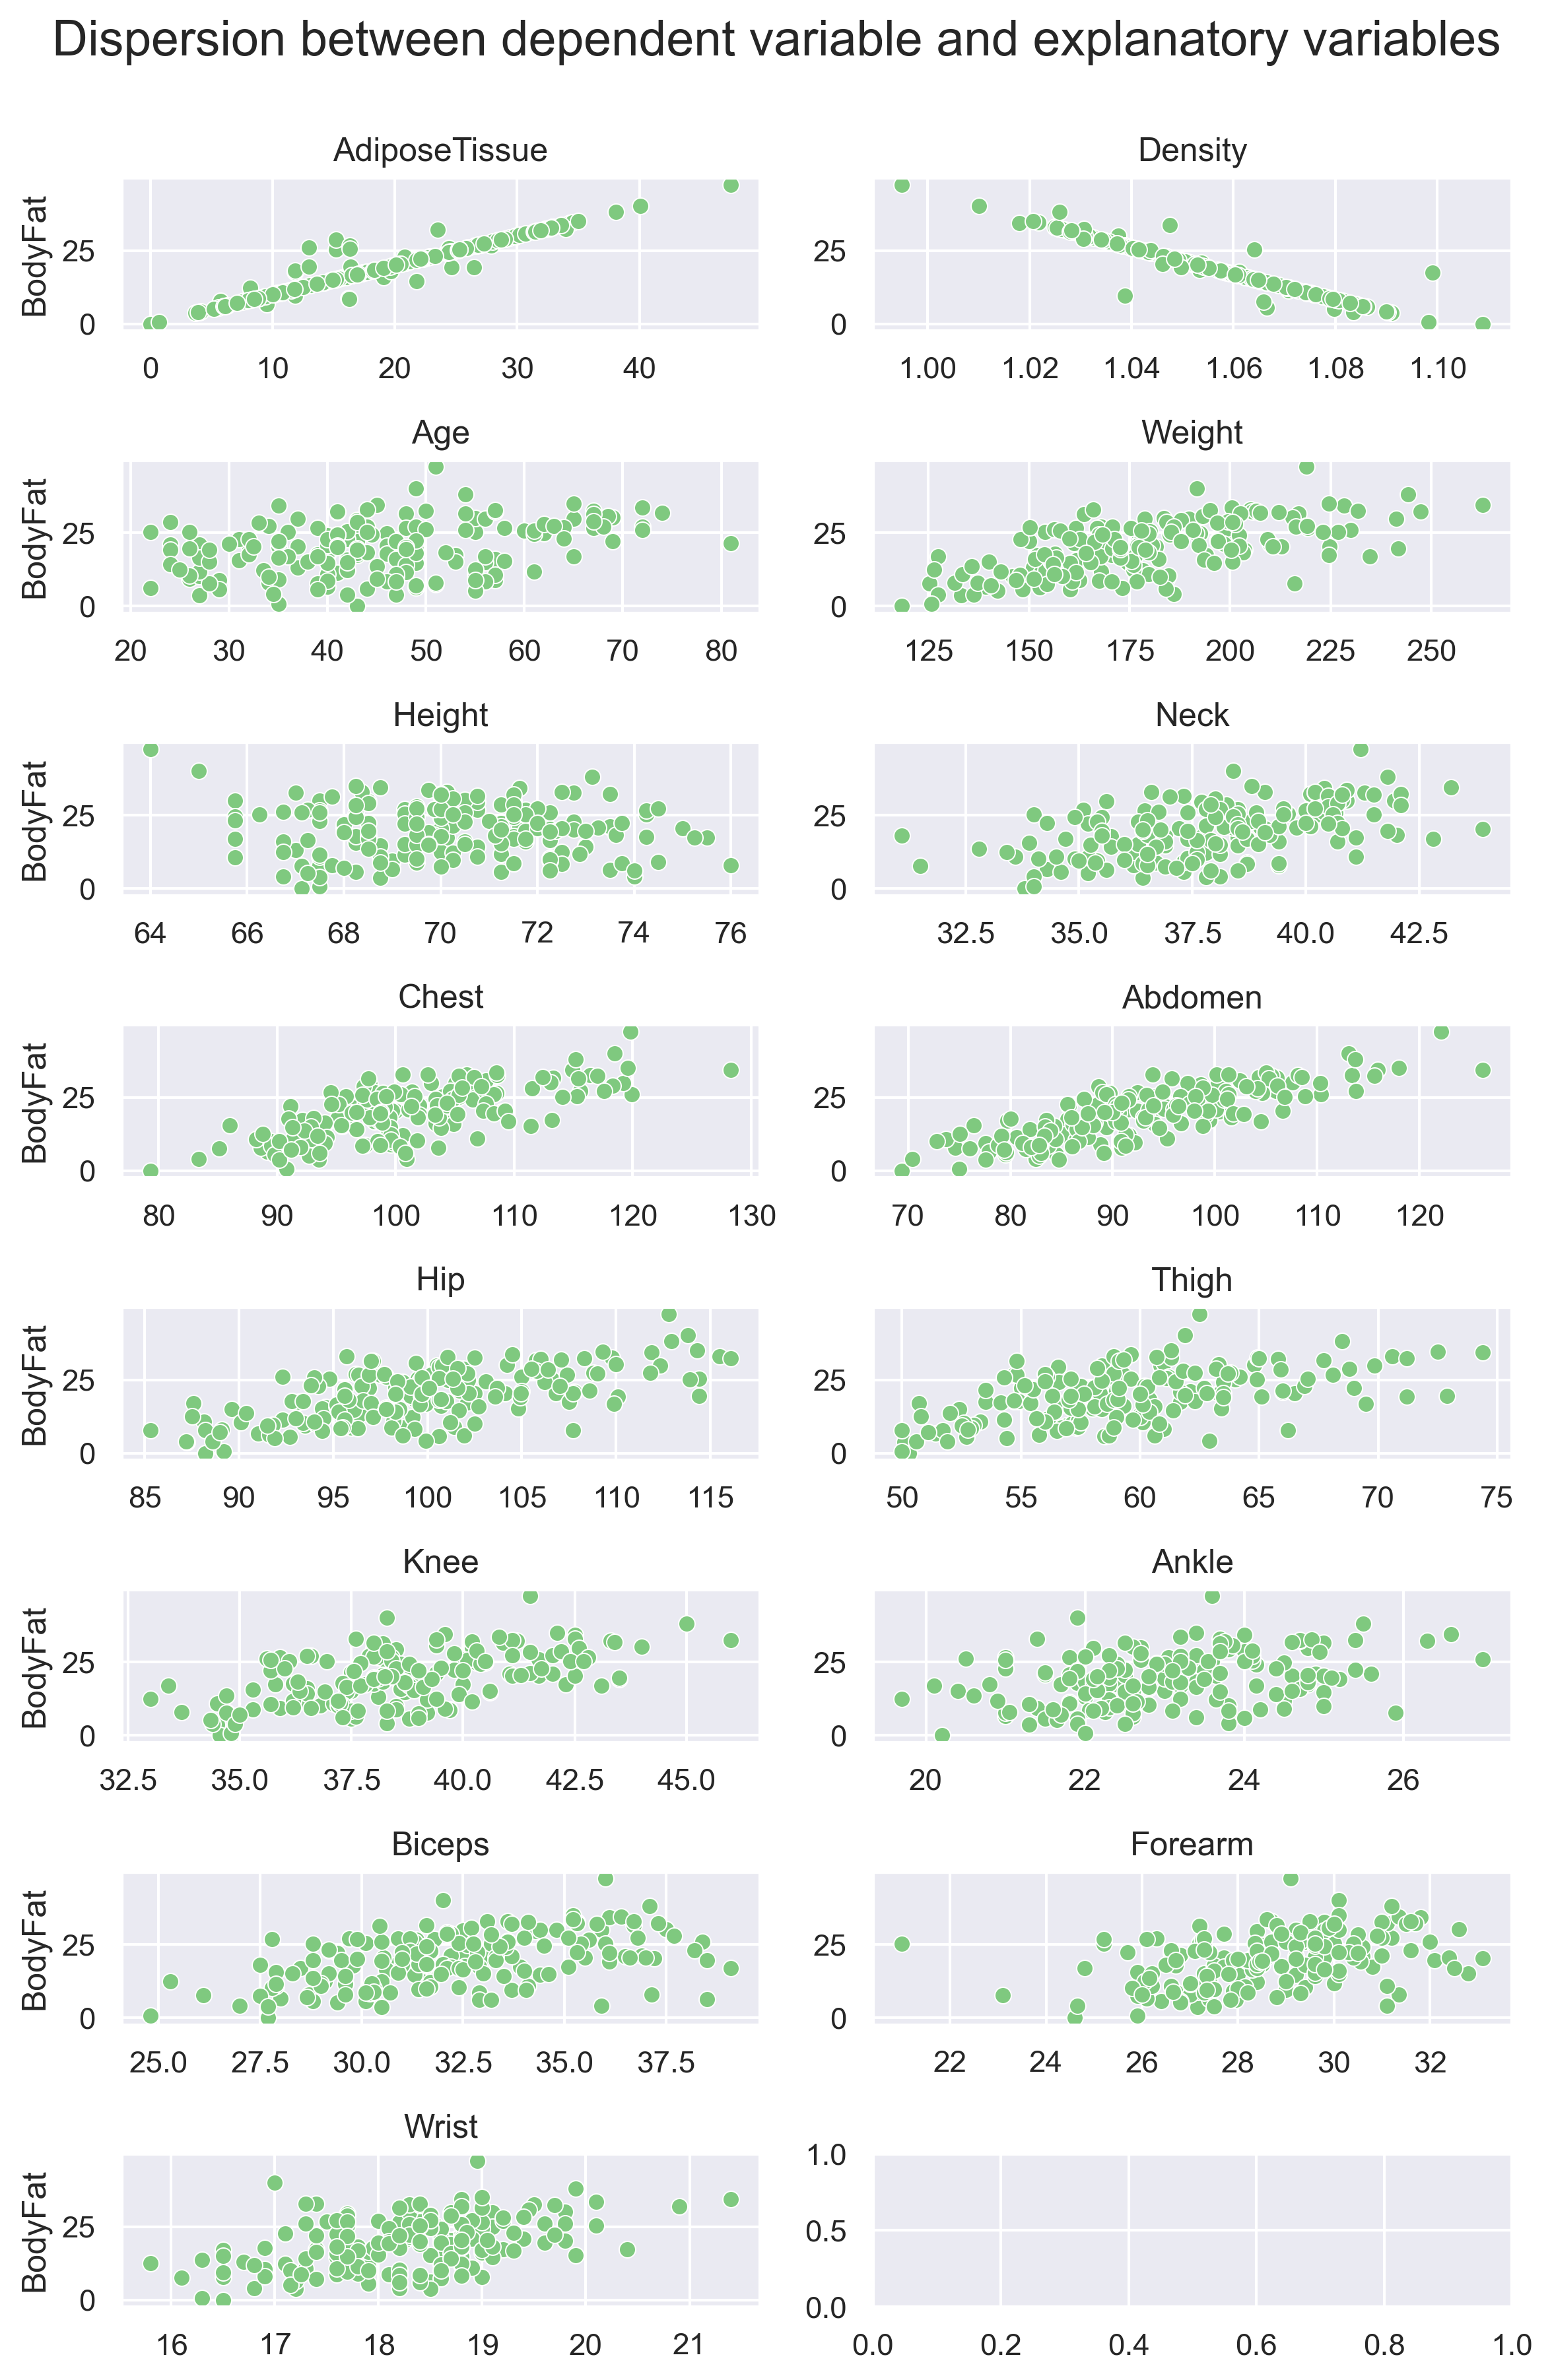

In [113]:
fig, axes = plt.subplots(nrows = 8, ncols = 2, figsize = (8,12), dpi = 300)
axes = axes.flatten()

for i, column in enumerate(explanatory_variables):
    sub = sns.scatterplot(
        data = dataset,
        x = dataset[column],
        y = dataset[dependent_variable],
        ax = axes[i]
    )
    sub.set(xlabel = None, ylabel = dependent_variable if i % 2 == 0 else None, title = column)
fig.suptitle('Dispersion between dependent variable and explanatory variables', fontsize = 18, y = 1)
plt.tight_layout()
plt.show()

## Correlation Matrix

<Axes: >

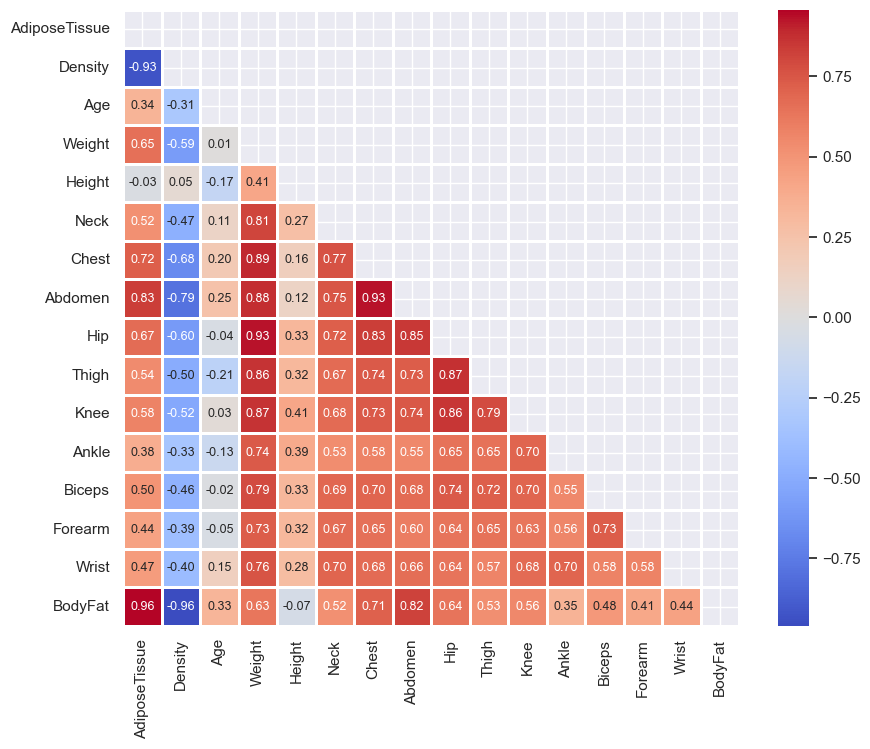

In [114]:


fig, ax = plt.subplots(figsize = (10,8))

corr_matrix = dataset.corr()

mask = np.triu(np.ones_like(corr_matrix))

sns.heatmap(
    data = corr_matrix,
    mask = mask,
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {'size': 9},
    fmt = '.2f',
    square = True,
    linewidths = 1,
    ax = ax
)

<Axes: >

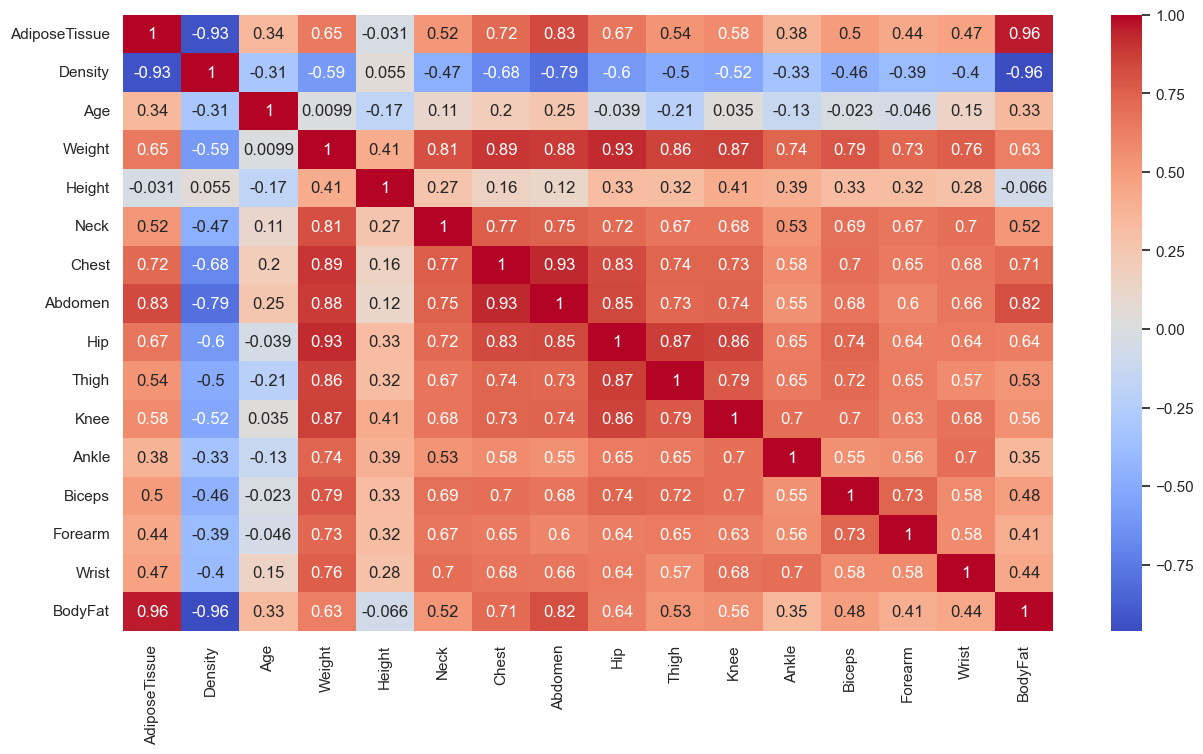

In [115]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

In [116]:
# Clean Test Set

In [117]:
testset = pd.read_csv('test.csv')
testset.head()

,AdiposeTissue,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,19.2,1.0549,35.0,217.00,73.75,40.5,107.5,95.1,104.5,64.8,41.3,25.6,36.4,NaN,NaN,19.2
1,19.2,1.0549,26.0,181.00,69.75,36.4,105.1,90.7,NaN,58.4,38.3,22.9,31.9,27.8,17.7,19.2
2,28.0,1.0355,NaN,183.25,70.00,37.1,108.0,105.0,103.0,63.7,40.0,23.6,33.5,27.8,17.4,28.0
3,NaN,1.0521,35.0,177.25,71.00,NaN,100.5,NaN,98.7,57.8,37.3,22.4,31.0,28.7,NaN,20.5
4,16.7,1.0607,40.0,158.00,69.25,36.3,97.0,86.6,92.6,55.9,36.3,22.1,29.8,NaN,17.3,16.7


In [118]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AdiposeTissue  68 non-null     float64
 1   Density        64 non-null     float64
 2   Age            63 non-null     float64
 3   Weight         68 non-null     float64
 4   Height         66 non-null     float64
 5   Neck           67 non-null     float64
 6   Chest          69 non-null     float64
 7   Abdomen        61 non-null     float64
 8   Hip            65 non-null     float64
 9   Thigh          59 non-null     float64
 10  Knee           67 non-null     float64
 11  Ankle          65 non-null     float64
 12  Biceps         64 non-null     float64
 13  Forearm        63 non-null     float64
 14  Wrist          66 non-null     float64
 15  BodyFat        76 non-null     float64
dtypes: float64(16)
memory usage: 9.6 KB


In [119]:
testset.duplicated().sum()

0

In [120]:
testset.describe()

,AdiposeTissue,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
count,68.000000,64.000000,63.000000,68.000000,66.000000,67.000000,69.000000,61.000000,65.000000,59.000000,67.000000,65.000000,64.000000,63.000000,66.000000,76.000000
mean,18.539706,1.059334,44.619048,177.471324,70.306818,38.071642,100.130435,92.544262,99.970769,59.216949,38.511940,23.281538,32.551562,28.807937,18.168182,18.176316
std,6.939249,0.015513,12.668769,32.301801,2.434051,2.671330,7.840755,11.378482,7.940339,5.774801,2.477139,2.046101,3.298773,1.839469,0.951138,7.242373
min,3.000000,1.028700,23.000000,125.000000,64.000000,33.200000,87.700000,76.500000,88.600000,49.600000,34.800000,19.100000,25.600000,25.700000,16.600000,3.000000
25%,12.975000,1.047700,35.000000,157.937500,68.812500,36.250000,95.400000,86.100000,96.100000,56.050000,36.650000,22.000000,30.375000,27.400000,17.400000,12.800000
50%,18.450000,1.060850,44.000000,171.000000,70.125000,37.900000,99.400000,91.600000,99.000000,58.400000,38.300000,22.900000,32.300000,28.600000,18.150000,18.450000
75%,23.375000,1.070425,54.000000,188.300000,72.187500,39.350000,103.700000,97.600000,103.200000,61.950000,39.650000,24.100000,34.800000,30.150000,18.800000,22.775000
max,35.200000,1.092600,72.000000,363.150000,74.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,35.200000


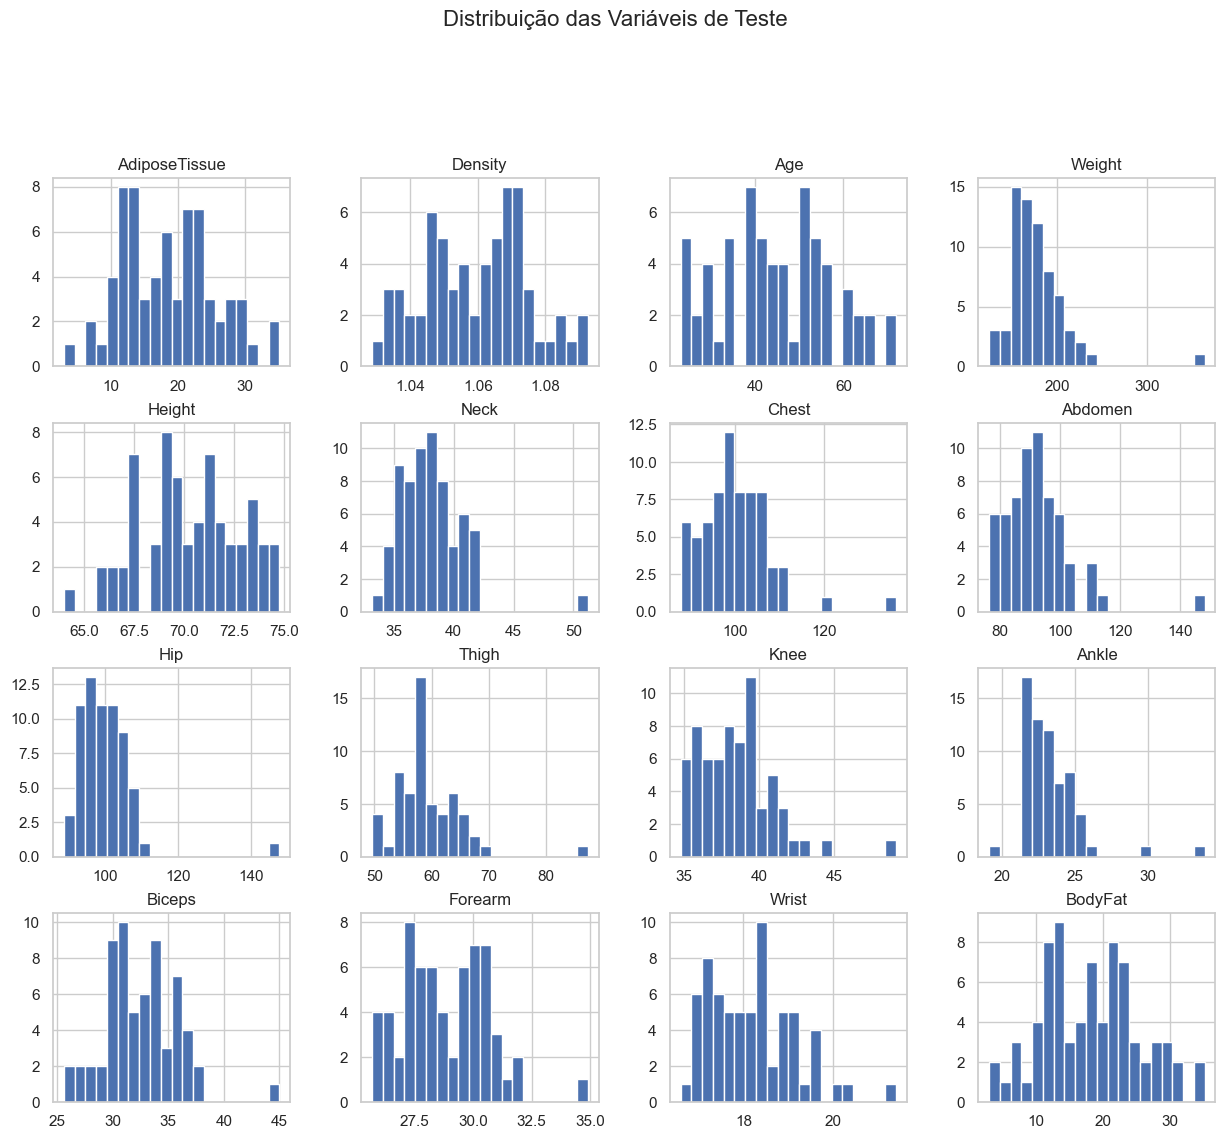

In [121]:
# Configurar estilo para gráficos
sns.set(style="whitegrid")

# Histogramas para cada variável
testset.hist(bins=20, figsize=(15, 12))
plt.suptitle('Distribuição das Variáveis de Teste', y=1.02, size=16)
plt.show()

In [122]:
# Identifique as colunas com dados ausentes
colunas_com_dados_ausentes = [col for col in testset.columns if testset[col].isnull().any()]

# Crie um KNN Imputer
imputer = KNNImputer(n_neighbors=2)

# Impute os valores ausentes
dados_imputados = imputer.fit_transform(testset[colunas_com_dados_ausentes])

# Crie um novo DataFrame com os valores imputados
dataset_imputado = pd.DataFrame(dados_imputados, columns=colunas_com_dados_ausentes)

# Adicione as colunas que não tinham dados ausentes
colunas_sem_ausentes = [col for col in testset.columns if col not in colunas_com_dados_ausentes]
dataset_imputado[colunas_sem_ausentes] = testset[colunas_sem_ausentes]

# Agora, dataset_imputado contém os valores imputados mantendo a estrutura do DataFrame original
testset= dataset_imputado
testset

,AdiposeTissue,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,19.20,1.0549,35.0,217.00,73.75,40.50,107.5,95.10,104.50,64.80,41.3,25.6,36.40,30.80,18.45,19.2
1,19.20,1.0549,26.0,181.00,69.75,36.40,105.1,90.70,100.85,58.40,38.3,22.9,31.90,27.80,17.70,19.2
2,28.00,1.0355,59.5,183.25,70.00,37.10,108.0,105.00,103.00,63.70,40.0,23.6,33.50,27.80,17.40,28.0
3,24.85,1.0521,35.0,177.25,71.00,37.55,100.5,92.25,98.70,57.80,37.3,22.4,31.00,28.70,17.70,20.5
4,16.70,1.0607,40.0,158.00,69.25,36.30,97.0,86.60,92.60,55.90,36.3,22.1,29.80,27.65,17.30,16.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,18.10,1.0575,36.5,187.50,72.25,38.00,101.8,87.50,101.00,58.50,39.2,24.5,34.55,28.60,17.80,18.1
72,18.50,1.0666,61.0,148.25,67.50,36.00,91.6,81.80,94.80,54.50,37.0,21.4,29.30,27.00,18.30,18.5
73,21.30,1.0503,42.0,163.00,70.25,35.30,93.5,89.60,98.40,61.50,37.8,21.9,30.70,27.60,17.40,21.3
74,25.80,1.0404,41.0,186.25,74.00,38.30,95.4,92.40,104.30,60.45,41.1,24.8,33.60,29.50,18.50,25.8


In [123]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AdiposeTissue  76 non-null     float64
 1   Density        76 non-null     float64
 2   Age            76 non-null     float64
 3   Weight         76 non-null     float64
 4   Height         76 non-null     float64
 5   Neck           76 non-null     float64
 6   Chest          76 non-null     float64
 7   Abdomen        76 non-null     float64
 8   Hip            76 non-null     float64
 9   Thigh          76 non-null     float64
 10  Knee           76 non-null     float64
 11  Ankle          76 non-null     float64
 12  Biceps         76 non-null     float64
 13  Forearm        76 non-null     float64
 14  Wrist          76 non-null     float64
 15  BodyFat        76 non-null     float64
dtypes: float64(16)
memory usage: 9.6 KB


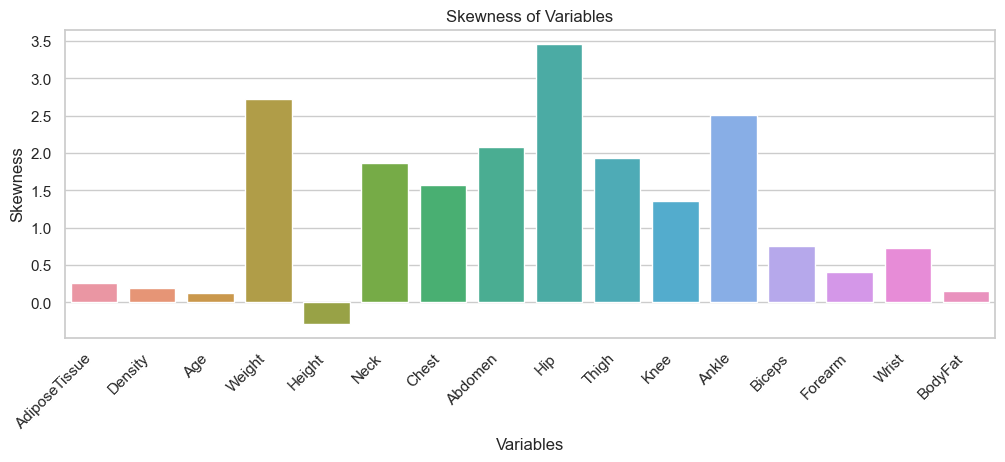

In [124]:
# Calculate skewness for each variable
skewness_per_variable = testset.apply(lambda x: x.skew())

# Plotting
plt.figure(figsize=(12, 4))
sns.barplot(x=skewness_per_variable.index, y=skewness_per_variable)
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Variables')
plt.xlabel('Variables')
plt.ylabel('Skewness')
plt.show()

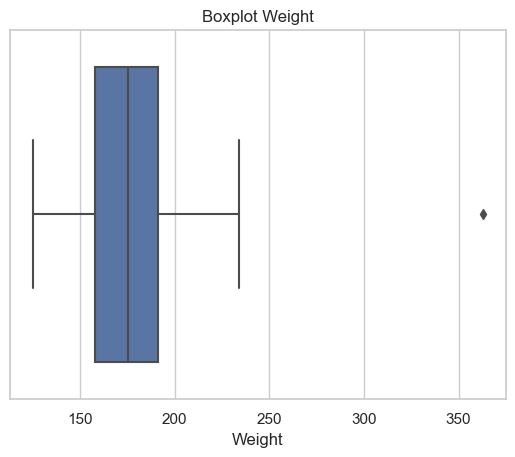

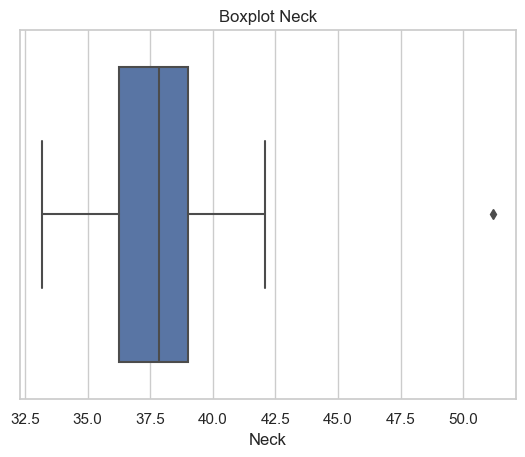

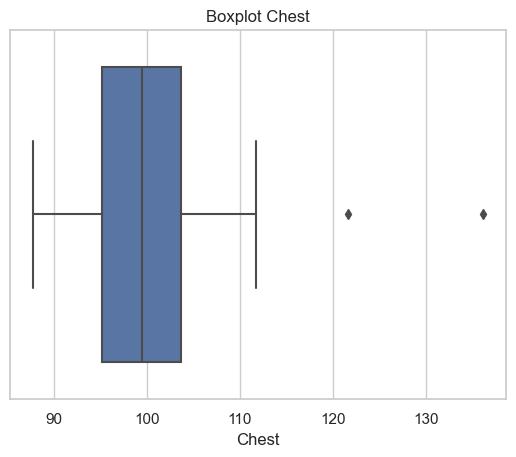

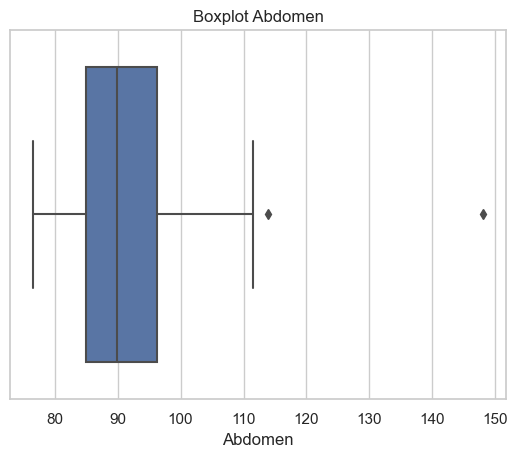

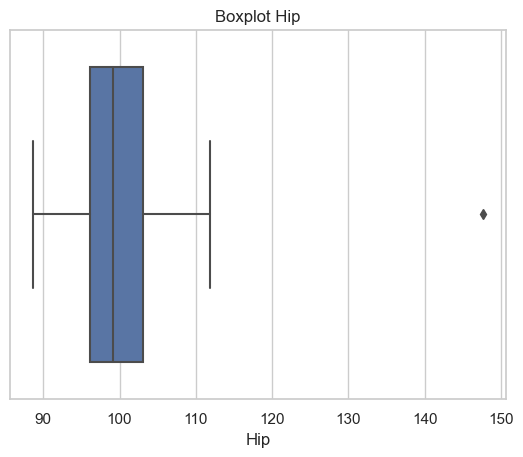

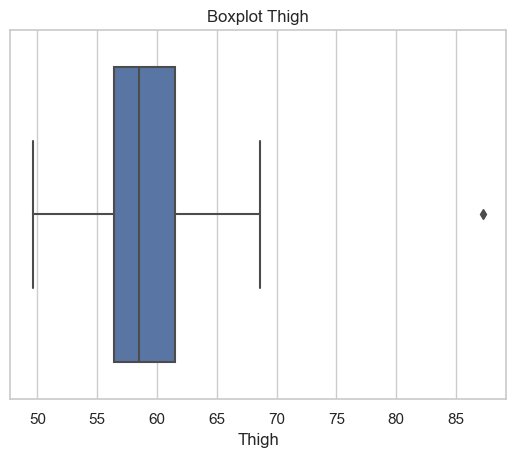

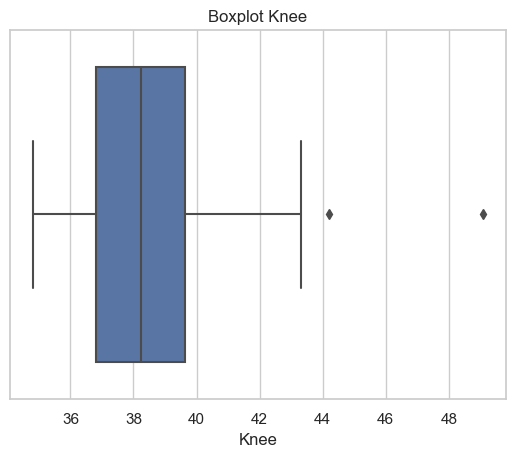

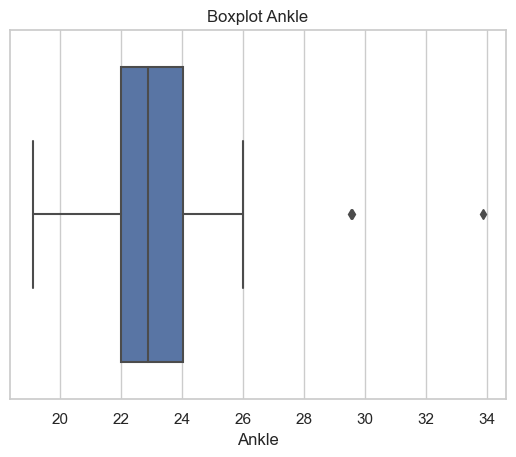

In [125]:
# Selecione as variáveis de interesse
cols = ['Weight', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle']

# Crie um loop para plotar boxplots para cada variável
for col in cols:
    # Crie o boxplot
    sns.boxplot(x=testset[col])

    # Adicione um título ao gráfico
    plt.title(f'Boxplot {col}')

    # Mostre o gráfico
    plt.show()

In [126]:
# Selecione as variáveis de interesse
cols = ['Weight', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle']

# Função para substituir outliers com a mediana
def replace_outliers_with_median(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Substitua outliers com a mediana no DataFrame original
    column[(column < lower_limit) | (column > upper_limit)] = column.median()

# Aplique a função às colunas selecionadas
for col in cols:
    replace_outliers_with_median(testset[col])

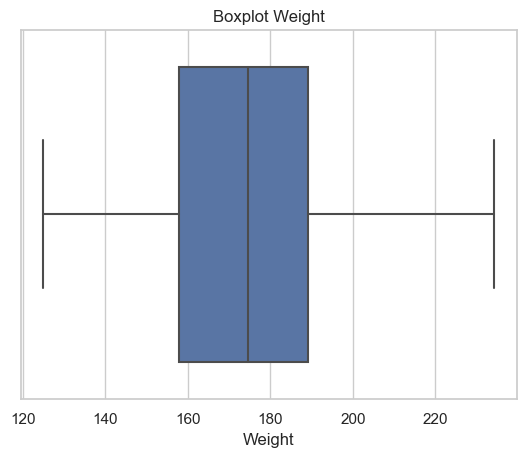

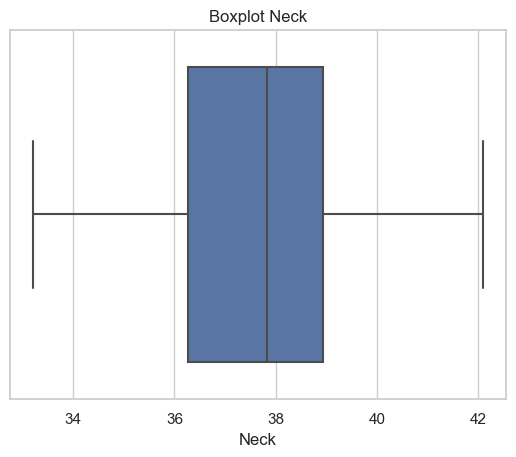

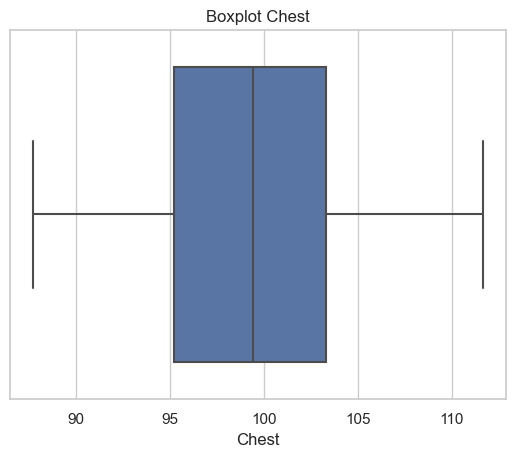

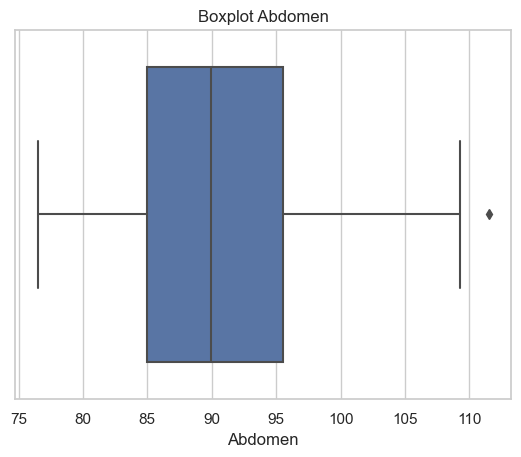

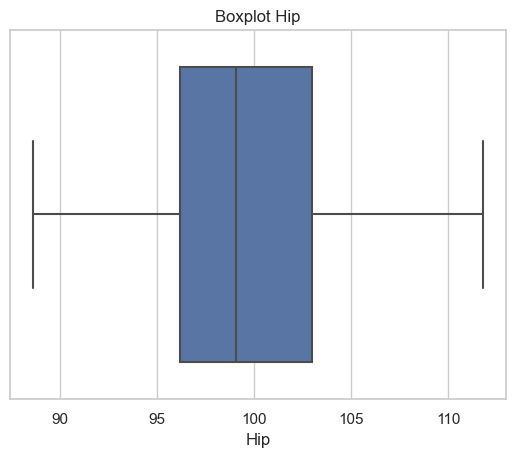

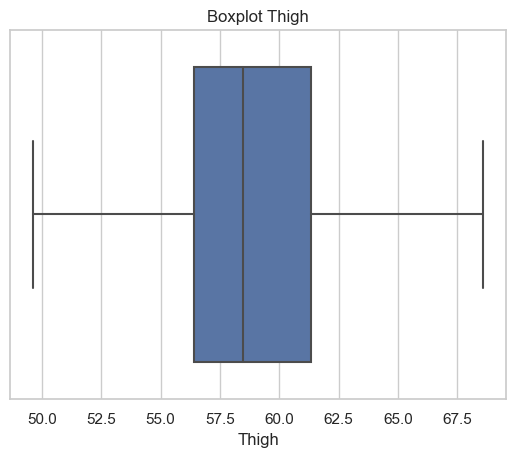

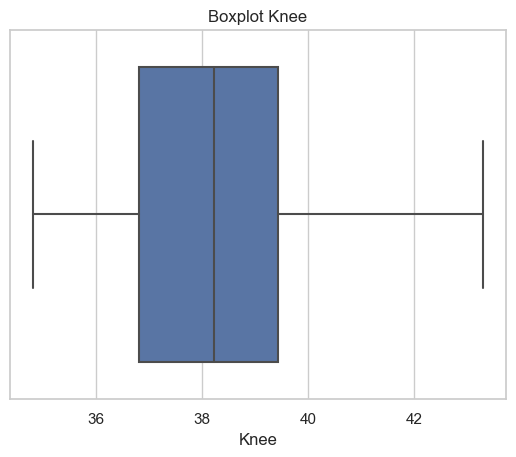

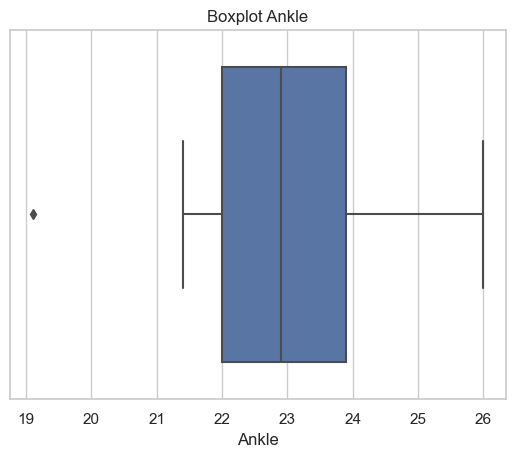

In [127]:
# Selecione as variáveis de interesse
cols = ['Weight', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle']

# Crie um loop para plotar boxplots para cada variável
for col in cols:
    # Crie o boxplot
    sns.boxplot(x=testset[col])

    # Adicione um título ao gráfico
    plt.title(f'Boxplot {col}')

    # Mostre o gráfico
    plt.show()

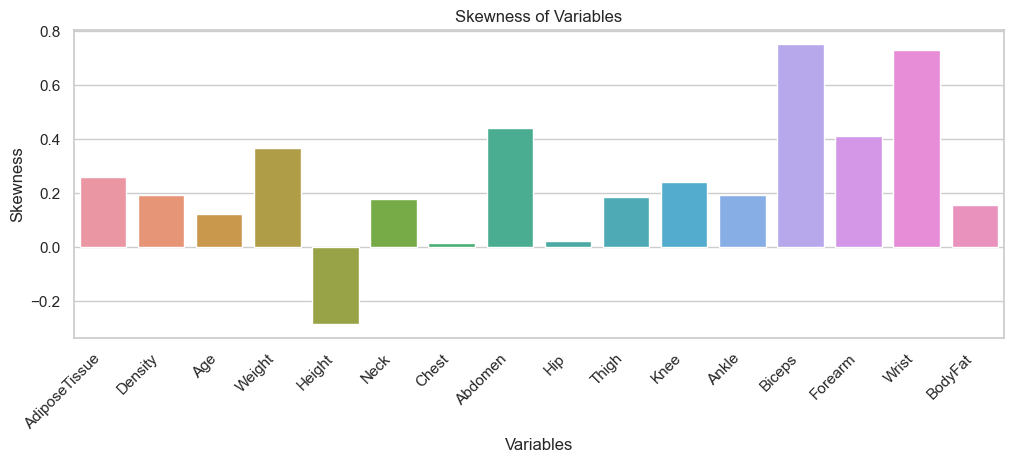

In [128]:
# Calculate skewness for each variable
skewness_per_variable = testset.apply(lambda x: x.skew())

# Plotting
plt.figure(figsize=(12, 4))
sns.barplot(x=skewness_per_variable.index, y=skewness_per_variable)
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Variables')
plt.xlabel('Variables')
plt.ylabel('Skewness')
plt.show()

# Splitting X and y

In [129]:
X = dataset.drop(columns = [dependent_variable])
y = dataset[dependent_variable]

# Hypothesis test

## With all explanatory variables

In [130]:
X_with_constant = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_constant, hasconst = True).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     237.4
Date:                Mon, 05 Feb 2024   Prob (F-statistic):          6.13e-101
Time:                        14:17:46   Log-Likelihood:                -355.04
No. Observations:                 176   AIC:                             742.1
Df Residuals:                     160   BIC:                             792.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           277.9748     26.223     10.600

## Without Density

In [131]:
X_with_constant = sm.add_constant(X.drop(columns = ['Density']))
model_sm = sm.OLS(y, X_with_constant, hasconst = True).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     136.6
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           1.38e-81
Time:                        14:17:46   Log-Likelihood:                -407.05
No. Observations:                 176   AIC:                             844.1
Df Residuals:                     161   BIC:                             891.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.9401     15.050      0.594

Excluding `Density`, the most relevant explanatory variables are `Abdomen` and `Adipose Tissue`.

In [132]:
X_with_constant = sm.add_constant(X[['AdiposeTissue', 'Abdomen']])
model_sm = sm.OLS(y, X_with_constant, hasconst = True).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     965.5
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           1.40e-94
Time:                        14:17:46   Log-Likelihood:                -412.07
No. Observations:                 176   AIC:                             830.1
Df Residuals:                     173   BIC:                             839.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.3632      2.479     -1.356

# Training models

## Single explanatory variable: Density

In [133]:
SEED = 42
np.random.seed(SEED)

lr = LinearRegression()
kf = KFold(n_splits = 5, shuffle = True)

cv_results = cross_validate(lr, X[['Density']], y, cv = kf, n_jobs = -1)

avg_r2 = cv_results['test_score'].mean()
std_r2 = cv_results['test_score'].std()
print('Average R²: %.2f' % (avg_r2 * 100))
print('R² Range: [%.2f, %.2f]' % ((avg_r2 * 100 - std_r2), (std_r2 + avg_r2 * 100)))

Average R²: 91.27
R² Range: [91.19, 91.34]


## Explanatory variables: Abdomen and Adipose Tissue

In [134]:
np.random.seed(SEED)

lr = LinearRegression()
kf = KFold(n_splits = 5, shuffle = True)

cv_results = cross_validate(lr, X[['Abdomen', 'AdiposeTissue']], y, cv = kf, n_jobs = -1)

avg_r2 = cv_results['test_score'].mean()
std_r2 = cv_results['test_score'].std()
print('Average R²: %.2f' % (avg_r2 * 100))
print('R² Range: [%.2f, %.2f]' % ((avg_r2 * 100 - std_r2), (std_r2 + avg_r2 * 100)))

Average R²: 91.85
R² Range: [91.81, 91.90]


In [135]:
x_train = x = dataset.drop(columns = [dependent_variable])
y_train = y = dataset[dependent_variable]

x_test = testset.drop(columns = [dependent_variable])
y_test = testset[dependent_variable]

In [136]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [137]:
y_pred = linear_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 0.8082673234792043
Mean Squared Error: 1.6524847484488507
R2 Score: 0.9680752116488184


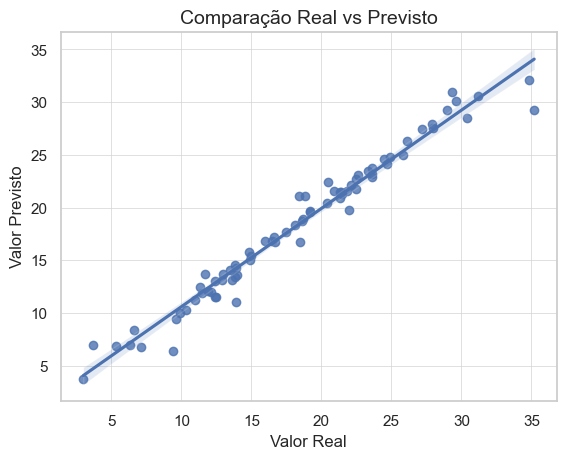

In [138]:
# Crie o scatterplot com regressão linear
sns.regplot(data=pd.DataFrame({'Real': y_test, 'Previsto': y_pred}), x='Real', y='Previsto', color='b')

# Personalize o gráfico
plt.xlabel("Valor Real", fontsize=12)
plt.ylabel("Valor Previsto", fontsize=12)
plt.title("Comparação Real vs Previsto", fontsize=14)
plt.grid(True, color='#D3D3D3', linewidth=0.5)
plt.show()


In [139]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [140]:
stacked_model = StackingRegressor(estimators=[('random',random),('linear',linear),('elastic',elastic),('lasso',lasso),('ridge',ridge),('svr',svr),('grad',grad),('sgd',sgd),('bay',bay)], final_estimator=lgbm)

NameError: name 'random' is not defined

In [ ]:
kernel = KernelRidge()
lgbm = LGBMRegressor(verbosity=-1)
random = RandomForestRegressor()
linear = linear_model
elastic = ElasticNet()
lasso  = Lasso()
ridge = Ridge()
svr=SVR()
grad = GradientBoostingRegressor()
sgd = SGDRegressor()
bay = BayesianRidge()
clf = [linear,elastic,lasso,ridge,svr,grad,sgd,bay,random,kernel,lgbm]
hashmap={}

In [ ]:
def compute(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = round(r2_score(y_test, y_pred),2)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Format scores with 2 decimal places
    rmse = round(rmse, 2)

    hashmap[str(model)] = (r2, rmse)

In [ ]:
for i in clf:
    compute(i)

In [ ]:
score = pd.DataFrame(hashmap)
score = score.transpose()
score.columns = ['R2_score', 'RMSE']
score = score.sort_values('R2_score', ascending=False)
score = score.style.format("{:.2f}")

In [ ]:
score